In [16]:

!unzip archive\ \(3\).zip -d data


Archive:  archive (3).zip
  inflating: data/sports_injury_detection_dataset.csv  


In [ ]:

import pandas as pd

df = pd.read_csv('archive (3).zip')  
print(df.head())


  Athlete_ID  Sport_Type Session_Date  Heart_Rate_BPM  Respiratory_Rate_BPM  \
0      A0001  Basketball   2024-01-01             151                    20   
1      A0002      Tennis   2024-01-02             114                    20   
2      A0003    Football   2024-01-03             171                    19   
3      A0004      Soccer   2024-01-04             160                    21   
4      A0005      Soccer   2024-01-05             120                    22   

   Skin_Temperature_C  Blood_Oxygen_Level_Percent  Impact_Force_Newtons  \
0           37.435984                   95.499334            135.269735   
1           36.859562                   98.440222            147.727352   
2           37.399096                   96.209444             81.617217   
3           36.862745                   99.555344            133.468431   
4           36.719032                   99.191327            178.474010   

   Cumulative_Fatigue_Index Activity_Type  Duration_Minutes  \
0          

In [19]:

pd.set_option('display.max_rows', None)
print(df)


    Athlete_ID  Sport_Type Session_Date  Heart_Rate_BPM  Respiratory_Rate_BPM  \
0        A0001  Basketball   2024-01-01             151                    20   
1        A0002      Tennis   2024-01-02             114                    20   
2        A0003    Football   2024-01-03             171                    19   
3        A0004      Soccer   2024-01-04             160                    21   
4        A0005      Soccer   2024-01-05             120                    22   
5        A0006    Baseball   2024-01-06             174                    24   
6        A0007      Soccer   2024-01-07             174                    16   
7        A0008      Tennis   2024-01-08             123                    21   
8        A0009    Football   2024-01-09             102                    22   
9        A0010  Basketball   2024-01-10             121                    18   
10       A0011      Soccer   2024-01-11             152                    23   
11       A0012  Basketball  

In [24]:
print(df.columns.tolist())

['Sport_Type', 'Heart_Rate_BPM', 'Skin_Temperature_C', 'Impact_Force_Newtons', 'Cumulative_Fatigue_Index', 'Activity_Type', 'Duration_Minutes', 'Injury_Risk_Score', 'Injury_Occurred']


In [28]:
df = df.drop(['Skin_Temperature_C'], axis=1)
print(df.columns)

Index(['Sport_Type', 'Heart_Rate_BPM', 'Impact_Force_Newtons',
       'Cumulative_Fatigue_Index', 'Activity_Type', 'Duration_Minutes',
       'Injury_Risk_Score', 'Injury_Occurred'],
      dtype='object')


In [29]:
print(df.columns.tolist())

['Sport_Type', 'Heart_Rate_BPM', 'Impact_Force_Newtons', 'Cumulative_Fatigue_Index', 'Activity_Type', 'Duration_Minutes', 'Injury_Risk_Score', 'Injury_Occurred']


In [54]:

print(type(df))
print(type(df.groupby('Sport_Type')))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [61]:
print(df.columns)

Index(['Sport_Type', 'Heart_Rate_BPM', 'Impact_Force_Newtons',
       'Cumulative_Fatigue_Index', 'Activity_Type', 'Duration_Minutes',
       'Injury_Risk_Score', 'Injury_Occurred'],
      dtype='object')


/tmp/ipykernel_5220/2160916025.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=injury_counts.index, y=injury_counts.values, palette='viridis')


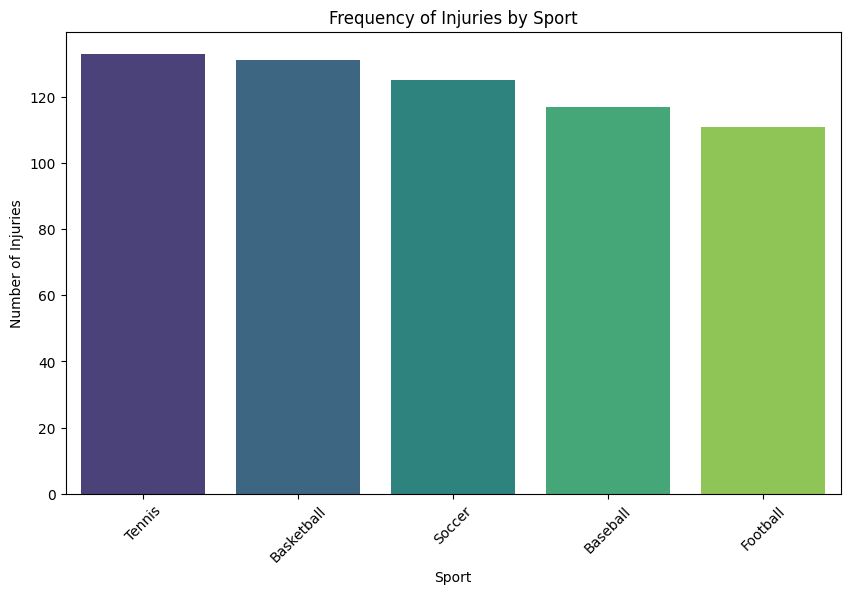

In [ ]:
injury_counts = df.groupby('Sport_Type')['Injury_Occurred'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=injury_counts.index, y=injury_counts.values, palette='viridis')
plt.title('Frequency of Injuries by Sport')
plt.xlabel('Sport')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)
plt.show()


In [ ]:

import plotly.express as px

injury_counts = df.groupby('Sport_Type')['Injury_Occurred'].sum().reset_index()

custom_colors = ['black', 'blue', 'lightgrey', 'tan', 'navy']

fig = px.bar(
    injury_counts,
    x='Sport_Type',
    y='Injury_Occurred',
    title='Frequency of Injuries by Sport',
    color='Sport_Type',
    hover_data=['Injury_Occurred'],
    color_discrete_sequence=custom_colors 
)

fig.update_layout(xaxis_title='Sport', yaxis_title='Number of Injuries')
fig.show()


/tmp/ipykernel_2800/3112175491.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


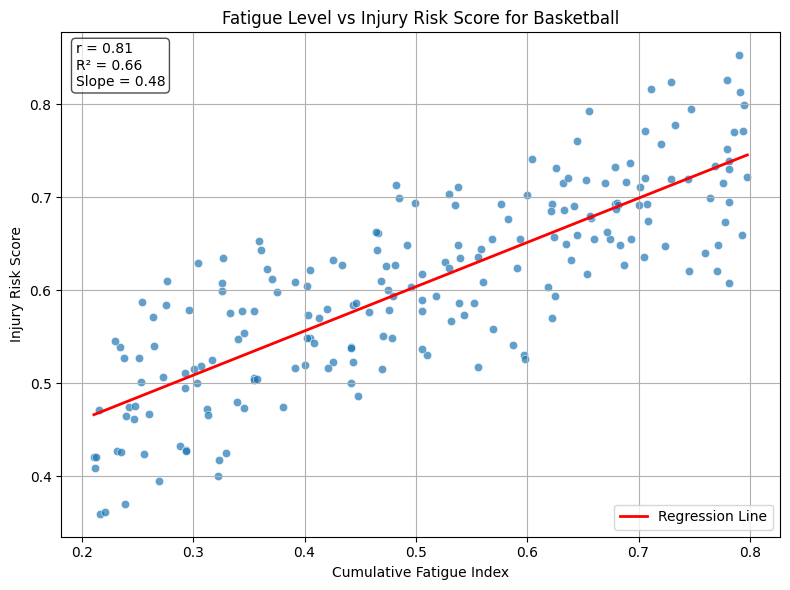

/tmp/ipykernel_2800/3112175491.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Basketball: Slope = 0.48, Intercept = 0.37, r = 0.81, R2 = 0.66


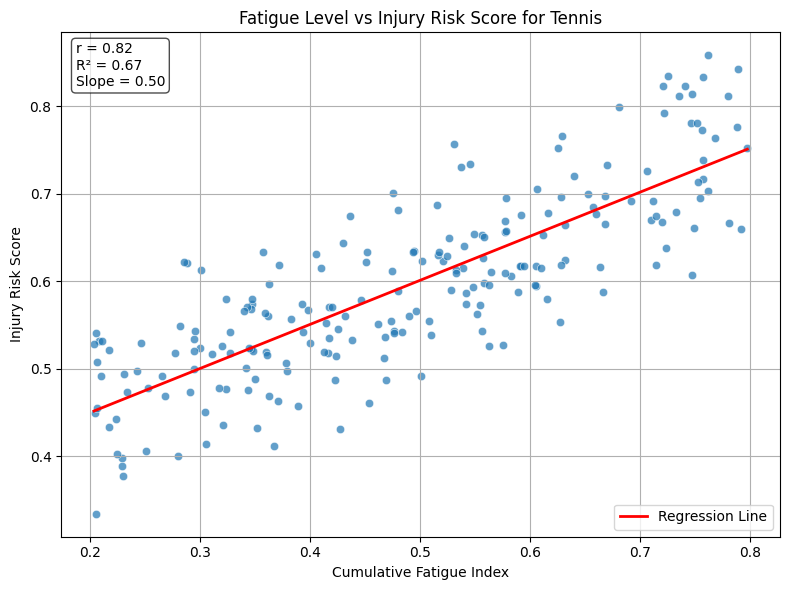

Tennis: Slope = 0.50, Intercept = 0.35, r = 0.82, R2 = 0.67


/tmp/ipykernel_2800/3112175491.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


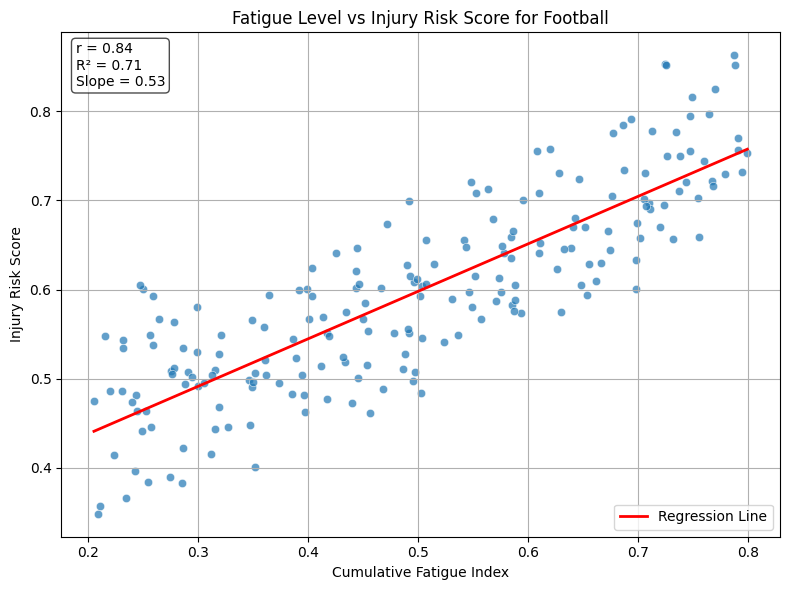

Football: Slope = 0.53, Intercept = 0.33, r = 0.84, R2 = 0.71


/tmp/ipykernel_2800/3112175491.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


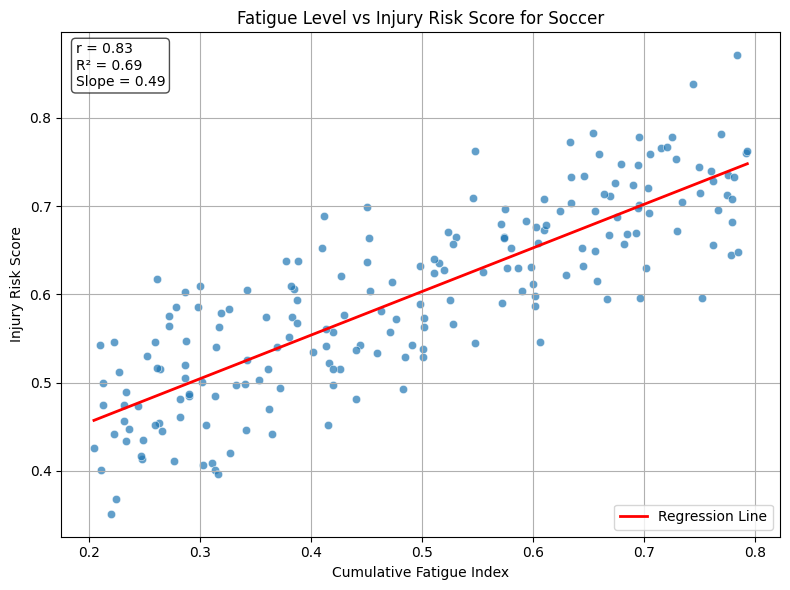

Soccer: Slope = 0.49, Intercept = 0.36, r = 0.83, R2 = 0.69


/tmp/ipykernel_2800/3112175491.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


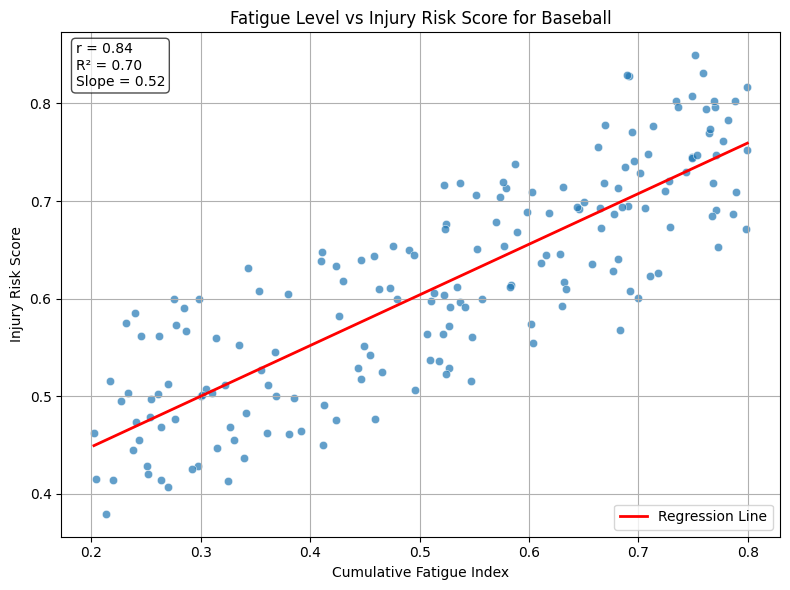

Baseball: Slope = 0.52, Intercept = 0.34, r = 0.84, R2 = 0.70


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
df = pd.read_csv('data/sports_injury_detection_dataset.csv')
sports = df['Sport_Type'].unique()
for sport in sports:
    sport_df = df[df['Sport_Type'] == sport]
    X = sport_df[['Cumulative_Fatigue_Index']]
    y = sport_df['Injury_Risk_Score']
    model = LinearRegression()
    model.fit(X, y)
    x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
    y_pred = model.predict(x_range)
    if len(X) >= 2:
        r = np.corrcoef(X.iloc[:, 0], y)[0, 1]
        r2 = r2_score(y, model.predict(X))
    else:
        r = np.nan
        r2 = np.nan

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X['Cumulative_Fatigue_Index'], y=y, alpha=0.7)
    plt.plot(x_range, y_pred, color='red', linewidth=2, label='Regression Line')

    annot_text = f"r = {r:.2f}\nR² = {r2:.2f}\nSlope = {model.coef_[0]:.2f}"
    plt.annotate(annot_text, xy=(0.02, 0.98), xycoords='axes fraction',
                 ha='left', va='top', fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))

    plt.title(f'Fatigue Level vs Injury Risk Score for {sport}')
    plt.xlabel('Cumulative Fatigue Index')
    plt.ylabel('Injury Risk Score')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    print(f"{sport}: Slope = {model.coef_[0]:.2f}, Intercept = {model.intercept_:.2f}, r = {r:.2f}, R2 = {r2:.2f}")
# ...existing code...

/tmp/ipykernel_2800/870570334.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


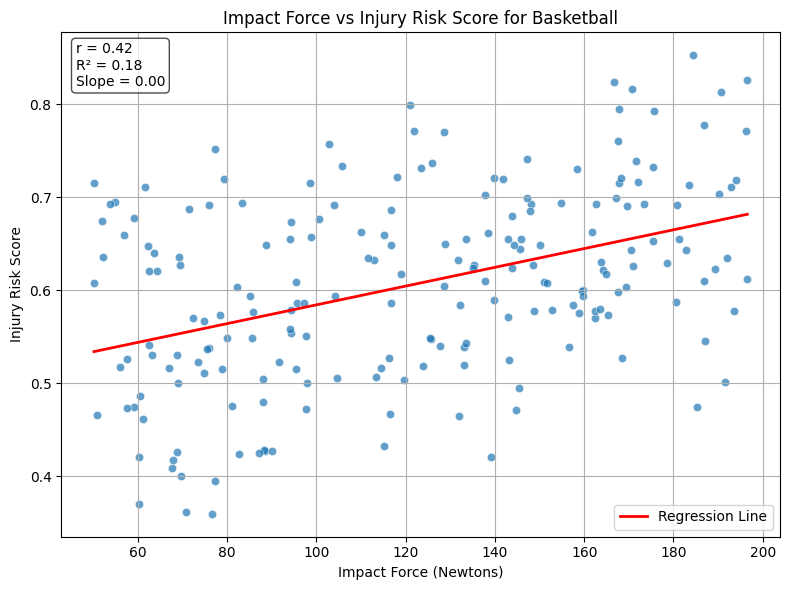

/tmp/ipykernel_2800/870570334.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Basketball: Slope = 0.00, Intercept = 0.48, r = 0.42, R2 = 0.18


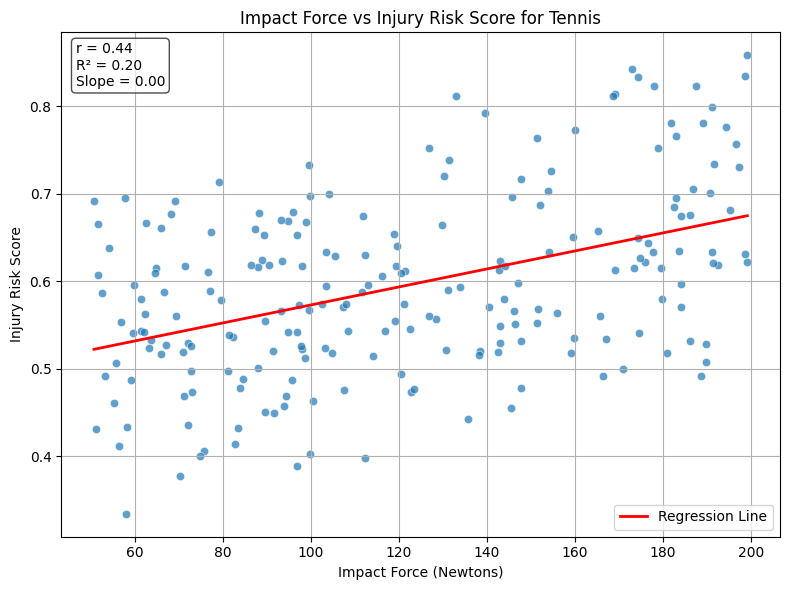

Tennis: Slope = 0.00, Intercept = 0.47, r = 0.44, R2 = 0.20


/tmp/ipykernel_2800/870570334.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


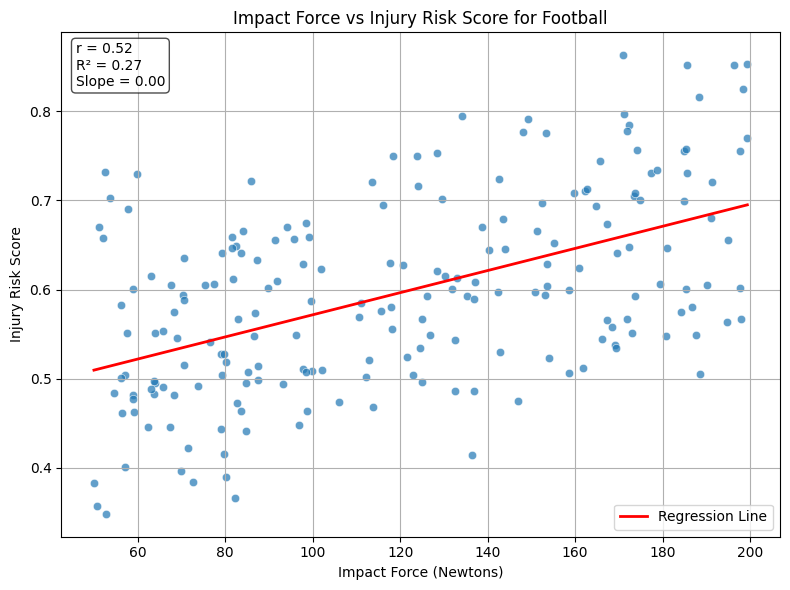

Football: Slope = 0.00, Intercept = 0.45, r = 0.52, R2 = 0.27


/tmp/ipykernel_2800/870570334.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


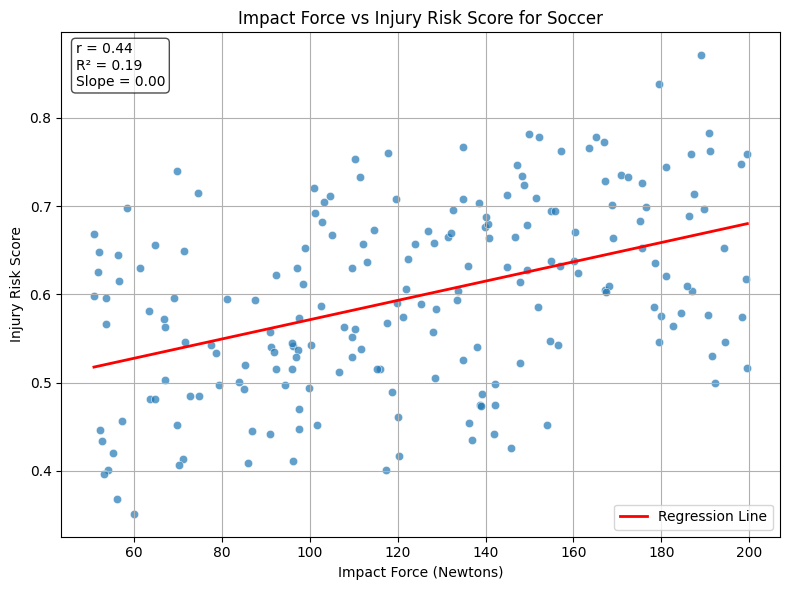

Soccer: Slope = 0.00, Intercept = 0.46, r = 0.44, R2 = 0.19


/tmp/ipykernel_2800/870570334.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


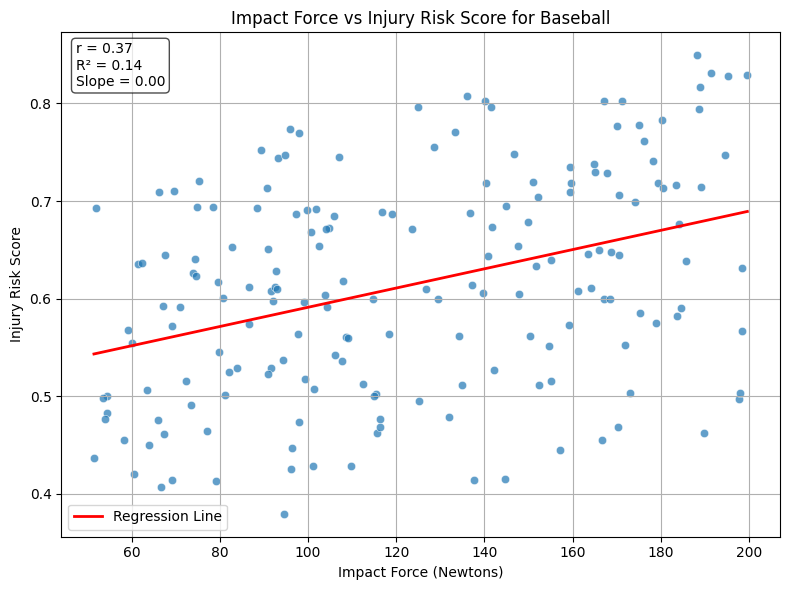

Baseball: Slope = 0.00, Intercept = 0.49, r = 0.37, R2 = 0.14


In [10]:
df = pd.read_csv('data/sports_injury_detection_dataset.csv')  
sports = df['Sport_Type'].unique()
for sport in sports:
    sport_df = df[df['Sport_Type'] == sport].dropna(subset=['Impact_Force_Newtons', 'Injury_Risk_Score'])
    X = sport_df[['Impact_Force_Newtons']]
    y = sport_df['Injury_Risk_Score']

    if len(X) < 2:
        print(f"{sport}: not enough data (n={len(X)})")
        continue
    model = LinearRegression()
    model.fit(X, y)
    x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
    y_pred = model.predict(x_range)
    # Pearson r and R^2
    r = np.corrcoef(X.iloc[:, 0], y)[0, 1]
    r2 = r2_score(y, model.predict(X))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X['Impact_Force_Newtons'], y=y, alpha=0.7)
    plt.plot(x_range, y_pred, color='red', linewidth=2, label='Regression Line')

    annot_text = f"r = {r:.2f}\nR² = {r2:.2f}\nSlope = {model.coef_[0]:.2f}"
    plt.annotate(annot_text, xy=(0.02, 0.98), xycoords='axes fraction',
                 ha='left', va='top', fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))

    plt.title(f'Impact Force vs Injury Risk Score for {sport}')
    plt.xlabel('Impact Force (Newtons)')
    plt.ylabel('Injury Risk Score')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print(f"{sport}: Slope = {model.coef_[0]:.2f}, Intercept = {model.intercept_:.2f}, r = {r:.2f}, R2 = {r2:.2f}")
# ...existing code...

/tmp/ipykernel_2800/3745608858.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


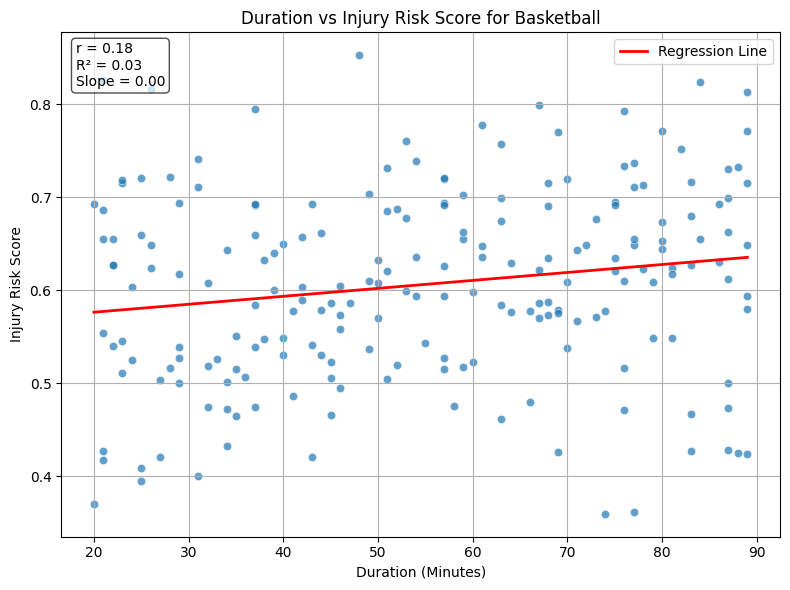

/tmp/ipykernel_2800/3745608858.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Basketball: Slope = 0.00, Intercept = 0.56, r = 0.18, R2 = 0.03


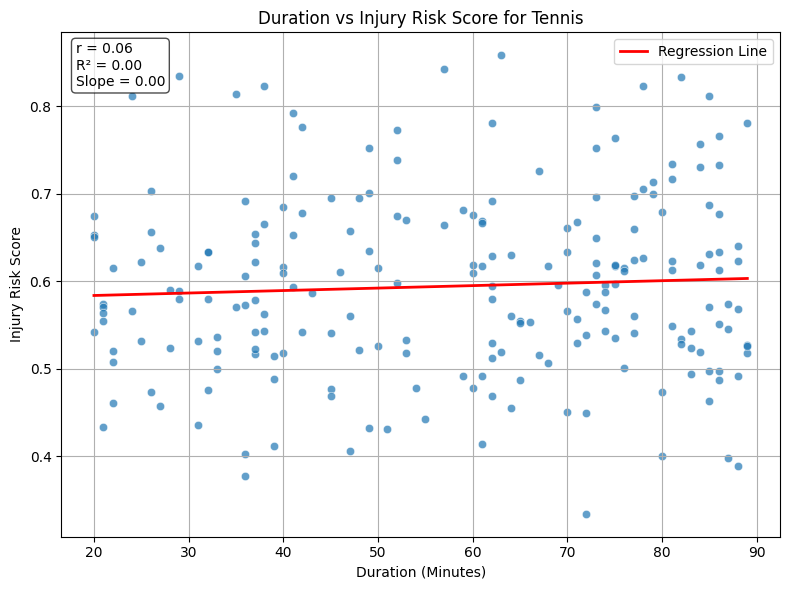

Tennis: Slope = 0.00, Intercept = 0.58, r = 0.06, R2 = 0.00


/tmp/ipykernel_2800/3745608858.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


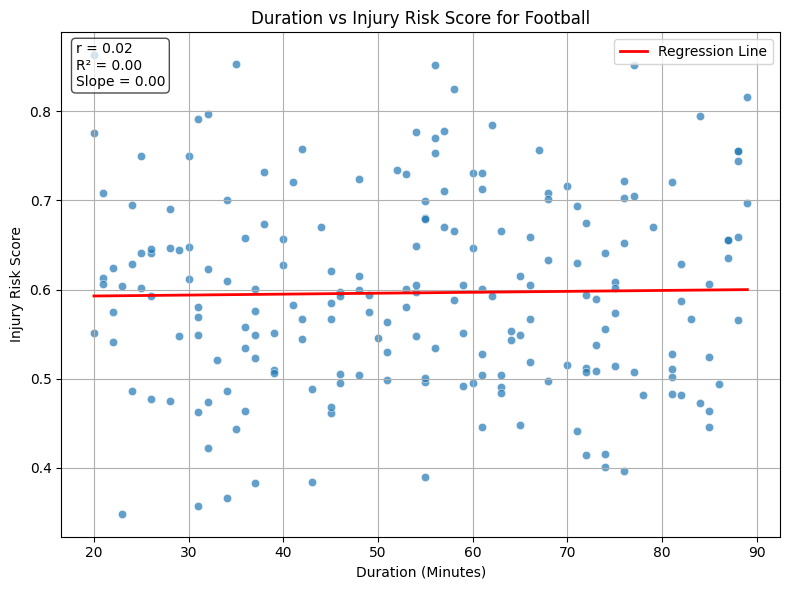

Football: Slope = 0.00, Intercept = 0.59, r = 0.02, R2 = 0.00


/tmp/ipykernel_2800/3745608858.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


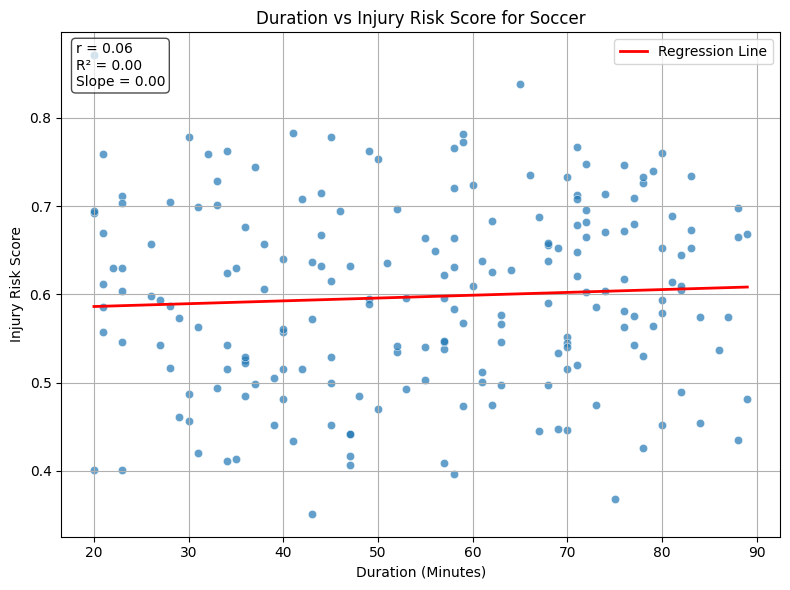

Soccer: Slope = 0.00, Intercept = 0.58, r = 0.06, R2 = 0.00


/tmp/ipykernel_2800/3745608858.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


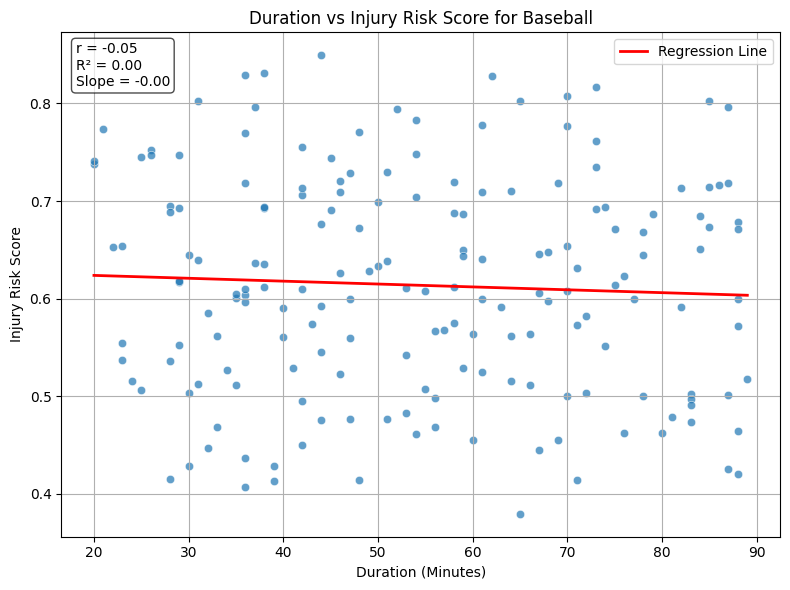

Baseball: Slope = -0.00, Intercept = 0.63, r = -0.05, R2 = 0.00


In [11]:
df = pd.read_csv('data/sports_injury_detection_dataset.csv')
sports = df['Sport_Type'].unique()
for sport in sports:
    sport_df = df[df['Sport_Type'] == sport].dropna(subset=['Duration_Minutes', 'Injury_Risk_Score'])
    X = sport_df[['Duration_Minutes']]
    y = sport_df['Injury_Risk_Score']

    if len(X) < 2:
        print(f"{sport}: not enough data (n={len(X)})")
        continue

    model = LinearRegression()
    model.fit(X, y)
    x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
    y_pred = model.predict(x_range)
    # Pearson r and R^2
    r = np.corrcoef(X.iloc[:, 0], y)[0, 1]
    r2 = r2_score(y, model.predict(X))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X['Duration_Minutes'], y=y, alpha=0.7)
    plt.plot(x_range, y_pred, color='red', linewidth=2, label='Regression Line')
    annot_text = f"r = {r:.2f}\nR² = {r2:.2f}\nSlope = {model.coef_[0]:.2f}"
    plt.annotate(annot_text, xy=(0.02, 0.98), xycoords='axes fraction',
                 ha='left', va='top', fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))

    plt.title(f'Duration vs Injury Risk Score for {sport}')
    plt.xlabel('Duration (Minutes)')
    plt.ylabel('Injury Risk Score')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print(f"{sport}: Slope = {model.coef_[0]:.2f}, Intercept = {model.intercept_:.2f}, r = {r:.2f}, R2 = {r2:.2f}")
# ...existing code...

/tmp/ipykernel_2800/3802306605.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


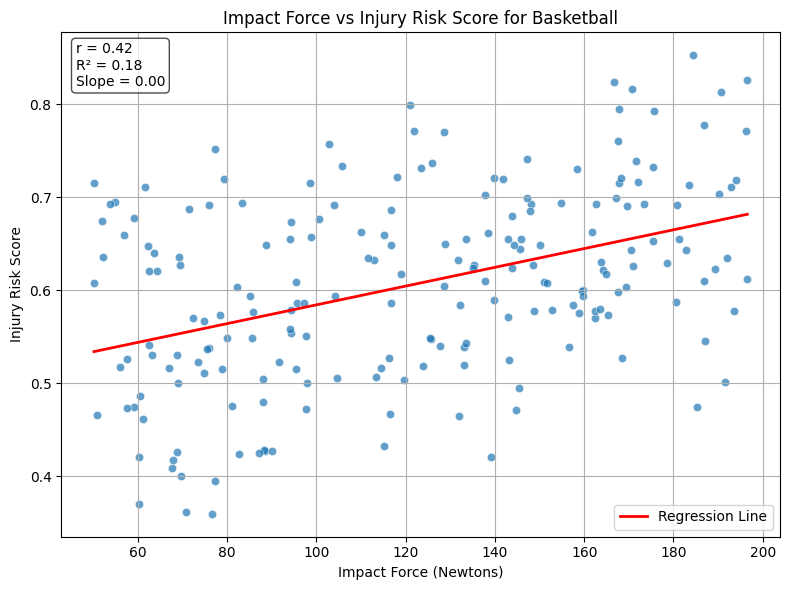

/tmp/ipykernel_2800/3802306605.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Basketball: Slope = 0.00, Intercept = 0.48, r = 0.42, R2 = 0.18


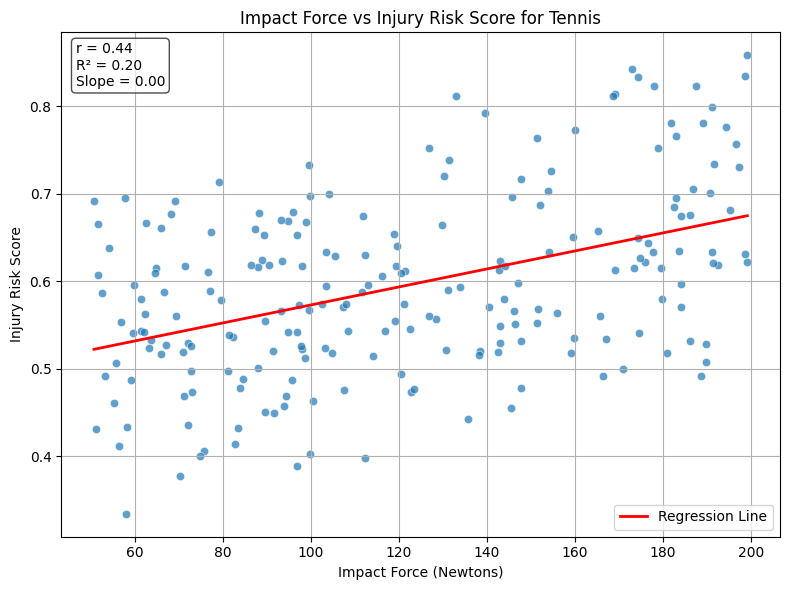

Tennis: Slope = 0.00, Intercept = 0.47, r = 0.44, R2 = 0.20


/tmp/ipykernel_2800/3802306605.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


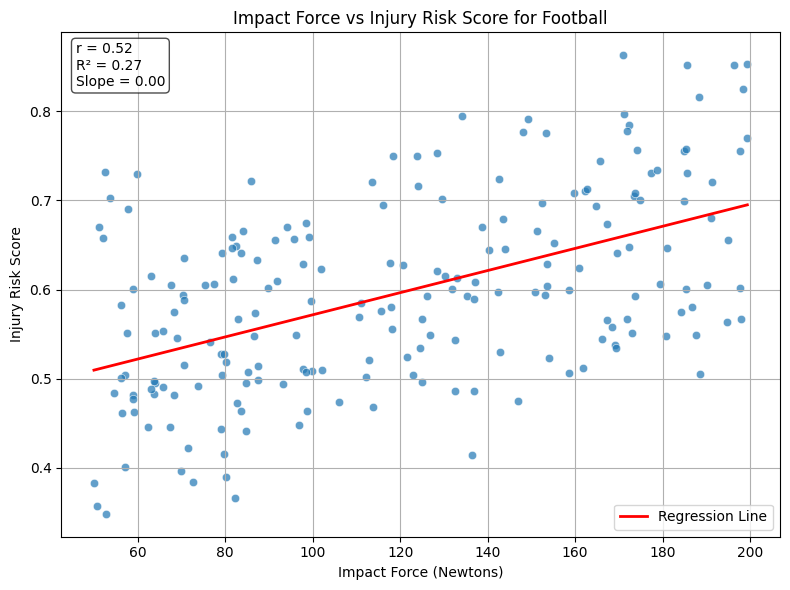

Football: Slope = 0.00, Intercept = 0.45, r = 0.52, R2 = 0.27


/tmp/ipykernel_2800/3802306605.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


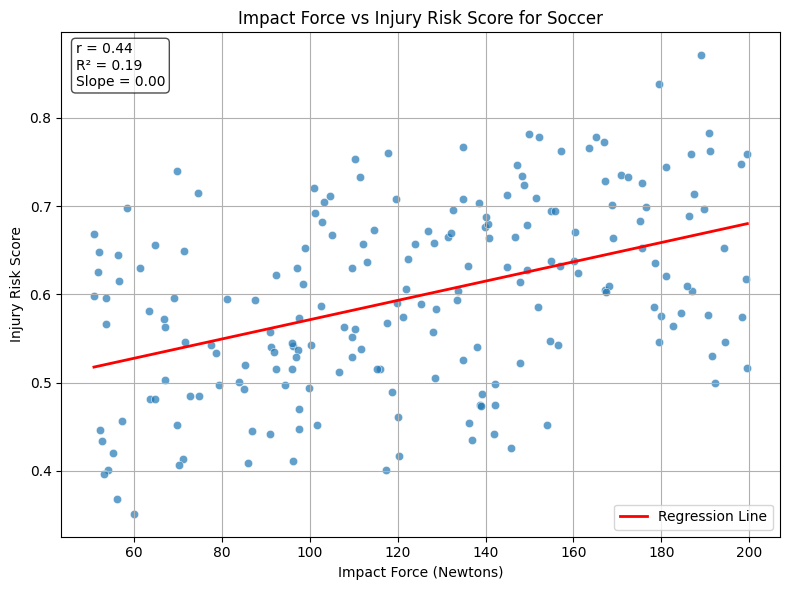

Soccer: Slope = 0.00, Intercept = 0.46, r = 0.44, R2 = 0.19


/tmp/ipykernel_2800/3802306605.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


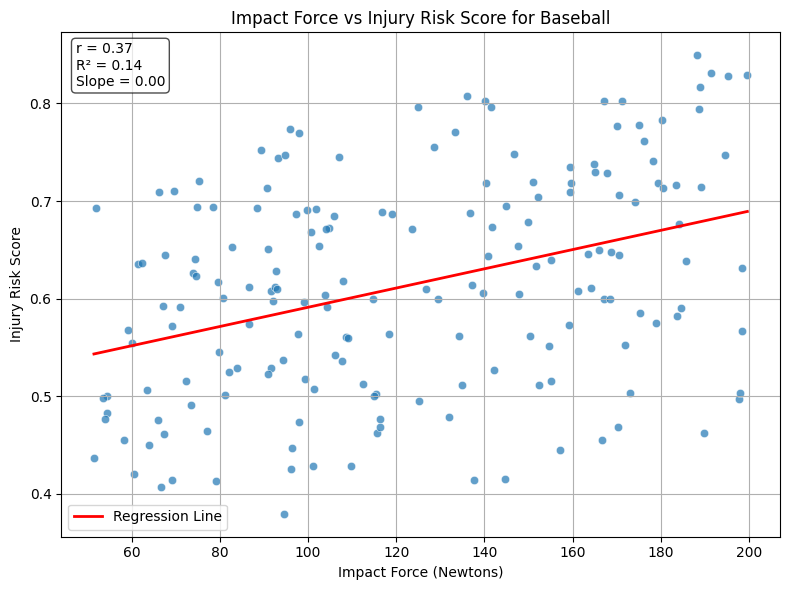

Baseball: Slope = 0.00, Intercept = 0.49, r = 0.37, R2 = 0.14


In [7]:
df = pd.read_csv('data/sports_injury_detection_dataset.csv')  

sports = df['Sport_Type'].unique()

for sport in sports:
    sport_df = df[df['Sport_Type'] == sport].dropna(subset=['Impact_Force_Newtons', 'Injury_Risk_Score'])
    X = sport_df[['Impact_Force_Newtons']]
    y = sport_df['Injury_Risk_Score']

    if len(X) < 2:
        print(f"{sport}: not enough data (n={len(X)})")
        continue

    model = LinearRegression()
    model.fit(X, y)

    x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
    y_pred = model.predict(x_range)

    # Pearson r and R^2
    r = np.corrcoef(X.iloc[:, 0], y)[0, 1]
    r2 = r2_score(y, model.predict(X))

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X['Impact_Force_Newtons'], y=y, alpha=0.7)
    plt.plot(x_range, y_pred, color='red', linewidth=2, label='Regression Line')

    annot_text = f"r = {r:.2f}\nR² = {r2:.2f}\nSlope = {model.coef_[0]:.2f}"
    plt.annotate(annot_text, xy=(0.02, 0.98), xycoords='axes fraction',
                 ha='left', va='top', fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))

    plt.title(f'Impact Force vs Injury Risk Score for {sport}')
    plt.xlabel('Impact Force (Newtons)')
    plt.ylabel('Injury Risk Score')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"{sport}: Slope = {model.coef_[0]:.2f}, Intercept = {model.intercept_:.2f}, r = {r:.2f}, R2 = {r2:.2f}")
# ...existing code...

/tmp/ipykernel_2800/2373895006.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


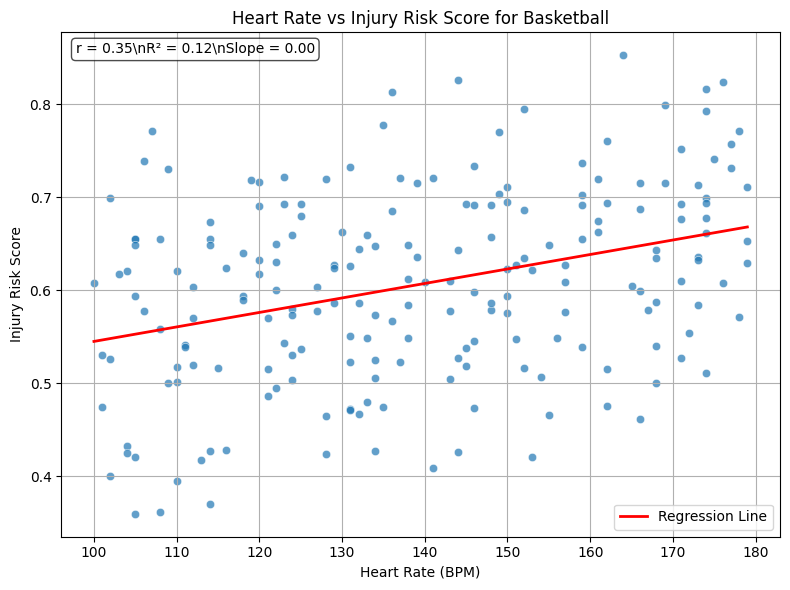

/tmp/ipykernel_2800/2373895006.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Basketball: Slope = 0.00, Intercept = 0.39, r = 0.35, R2 = 0.12


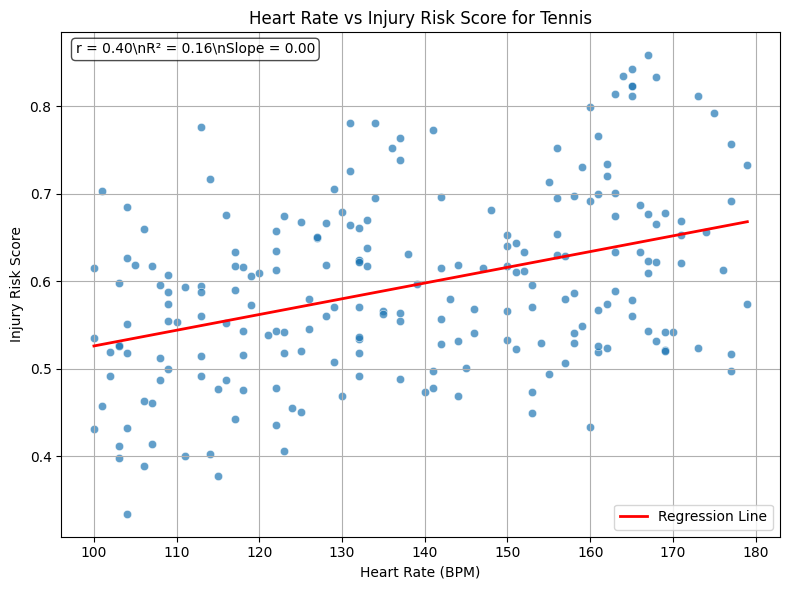

Tennis: Slope = 0.00, Intercept = 0.35, r = 0.40, R2 = 0.16


/tmp/ipykernel_2800/2373895006.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


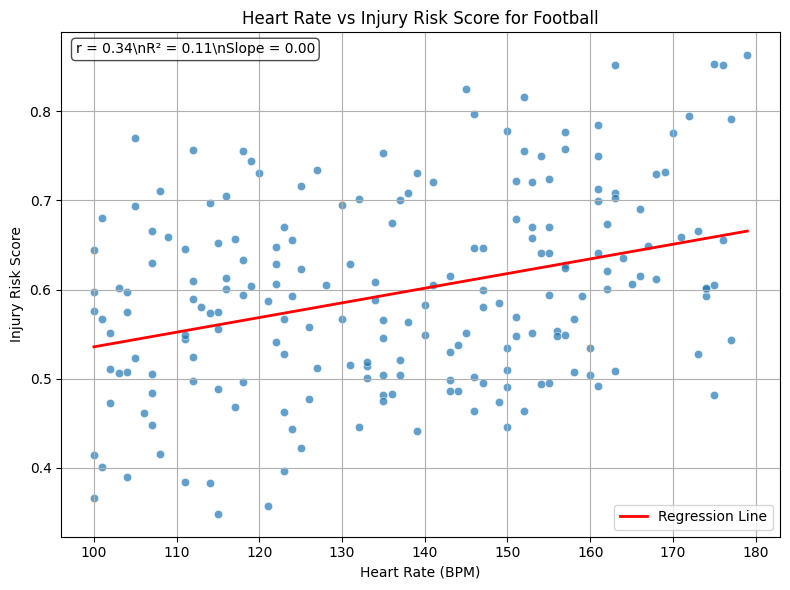

Football: Slope = 0.00, Intercept = 0.37, r = 0.34, R2 = 0.11


/tmp/ipykernel_2800/2373895006.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


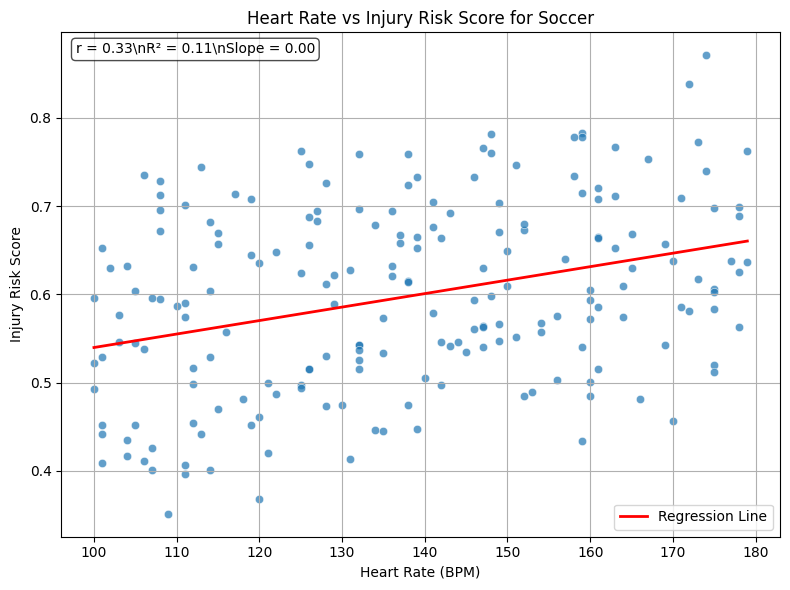

Soccer: Slope = 0.00, Intercept = 0.39, r = 0.33, R2 = 0.11


/tmp/ipykernel_2800/2373895006.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


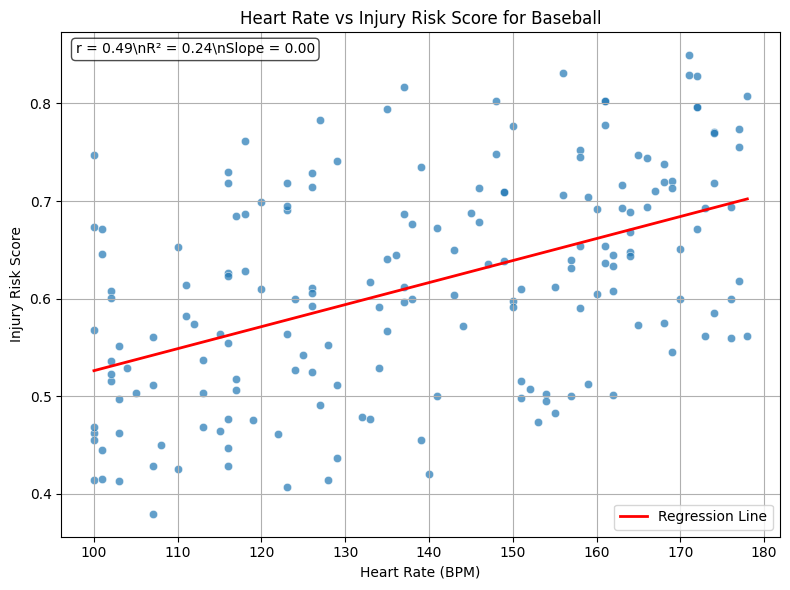

Baseball: Slope = 0.00, Intercept = 0.30, r = 0.49, R2 = 0.24


In [12]:
df = pd.read_csv('data/sports_injury_detection_dataset.csv')
sports = df['Sport_Type'].unique()
for sport in sports:
    sport_df = df[df['Sport_Type'] == sport].dropna(subset=['Heart_Rate_BPM', 'Injury_Risk_Score'])
    X = sport_df[['Heart_Rate_BPM']]
    y = sport_df['Injury_Risk_Score']
    if len(X) < 2:
        print(f"{sport}: not enough data (n={len(X)})")
        continue
    model = LinearRegression()
    model.fit(X, y)
    x_range = np.linspace(X.min()[0], X.max()[0], 100).reshape(-1, 1)
    y_pred = model.predict(x_range)
    if len(X) >= 2:
        r = np.corrcoef(X.iloc[:, 0], y)[0, 1]
        r2 = r2_score(y, model.predict(X))
    else:
        r = np.nan
        r2 = np.nan
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X['Heart_Rate_BPM'], y=y, alpha=0.7)
    plt.plot(x_range, y_pred, color='red', linewidth=2, label='Regression Line')
    annot_text = f"r = {r:.2f}\\nR² = {r2:.2f}\\nSlope = {model.coef_[0]:.2f}"
    plt.annotate(annot_text, xy=(0.02, 0.98), xycoords='axes fraction',
                 ha='left', va='top', fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))
    plt.title(f'Heart Rate vs Injury Risk Score for {sport}')
    plt.xlabel('Heart Rate (BPM)')
    plt.ylabel('Injury Risk Score')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print(f"{sport}: Slope = {model.coef_[0]:.2f}, Intercept = {model.intercept_:.2f}, r = {r:.2f}, R2 = {r2:.2f}")


In [6]:
print(df.columns)

Index(['Athlete_ID', 'Sport_Type', 'Session_Date', 'Heart_Rate_BPM',
       'Respiratory_Rate_BPM', 'Skin_Temperature_C',
       'Blood_Oxygen_Level_Percent', 'Impact_Force_Newtons',
       'Cumulative_Fatigue_Index', 'Activity_Type', 'Duration_Minutes',
       'Injury_Risk_Score', 'Injury_Occurred'],
      dtype='object')


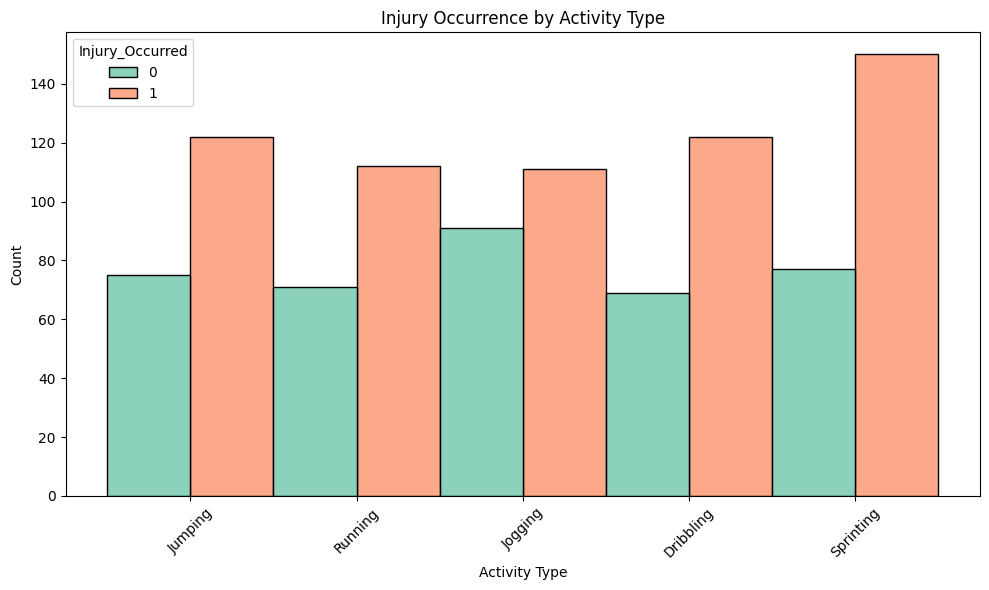

<Axes: xlabel='Activity_Type', ylabel='Count'>

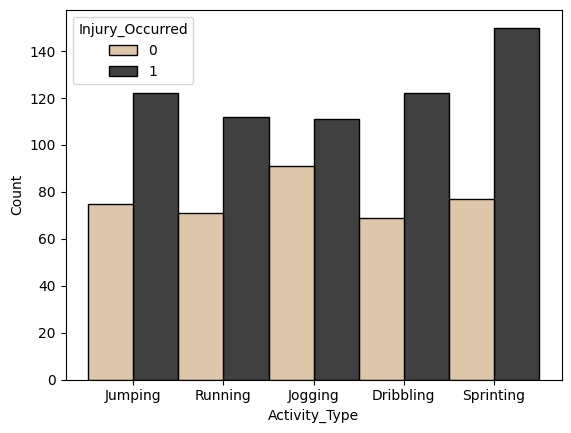

In [21]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Activity_Type', hue='Injury_Occurred', multiple='dodge', palette='Set2')

custom_colors = ['black','tan']

plt.title('Injury Occurrence by Activity Type')
plt.xlabel('Activity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sns.histplot(
    data=df,
    x='Activity_Type',
    hue='Injury_Occurred',
    multiple='dodge',
    palette=['Tan', 'Black'] 
) 

In [1]:
threshold = 0.5

In [7]:

import pandas as pd

# Load the dataset again
df = pd.read_csv('data/sports_injury_detection_dataset.csv')


In [8]:
print(df.columns)

Index(['Athlete_ID', 'Sport_Type', 'Session_Date', 'Heart_Rate_BPM',
       'Respiratory_Rate_BPM', 'Skin_Temperature_C',
       'Blood_Oxygen_Level_Percent', 'Impact_Force_Newtons',
       'Cumulative_Fatigue_Index', 'Activity_Type', 'Duration_Minutes',
       'Injury_Risk_Score', 'Injury_Occurred'],
      dtype='object')


In [13]:

from sklearn.metrics import precision_score

# Convert risk score to binary (e.g., threshold = 0.5)
df['Predicted_Injury'] = (df['Injury_Risk_Score'] >= 0.5).astype(int)

precision = precision_score(df['Injury_Occurred'], df['Predicted_Injury'])
print("Precision:", precision)


Precision: 0.6524390243902439


In [14]:

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(df['Injury_Occurred'], df['Predicted_Injury'])
print("Accuracy:", accuracy)


Accuracy: 0.633
